In [16]:
import csv
import numpy as np
from random import gauss, uniform
import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib as mpl

import orlab as orl

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['mathtext.fontset'] = 'cm'

In [17]:
def unpickler(path):
    with open(path, 'rb') as file:
        return pkl.load(file)

In [18]:
trap_data = unpickler('./Data Files/Trapezoidal/trap_monte_carlo_data.pkl')
trap_events = unpickler('./Data Files/Trapezoidal/trap_monte_carlo_events.pkl')

ellip_data = unpickler('./Data Files/Elliptical/ellip_monte_carlo_data.pkl')
ellip_events = unpickler('./Data Files/Elliptical/ellip_monte_carlo_events.pkl')

swept_data = unpickler('./Data Files/Swept/swept_monte_carlo_data.pkl')
swept_events = unpickler('./Data Files/Swept/swept_monte_carlo_events.pkl')

tapswept_data = unpickler('./Data Files/Tapered Swept/tapered_swept_monte_carlo_data.pkl')
tapswept_events = unpickler('./Data Files/Tapered Swept/tapered_swept_monte_carlo_events.pkl')

In [19]:
trap_apogee_times = []
trap_apogee_altitudes = []
trap_max_velocity = []
trap_max_acceleration = []
trap_off_rod_velocity = []
trap_full_flight_duration = []
trap_ground_hit_velocity = []
trap_off_rod_stability = []

for sim, event in zip(trap_data, trap_events):
    trap_apogee_times.append(event[orl.FlightEvent.APOGEE])
    trap_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    trap_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    trap_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    trap_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    trap_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    trap_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    trap_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

ellip_apogee_times = []
ellip_apogee_altitudes = []
ellip_max_velocity = []
ellip_max_acceleration = []
ellip_off_rod_velocity = []
ellip_full_flight_duration = []
ellip_ground_hit_velocity = []
ellip_off_rod_stability = []

for sim, event in zip(ellip_data, ellip_events):
    ellip_apogee_times.append(event[orl.FlightEvent.APOGEE])
    ellip_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    ellip_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    ellip_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    ellip_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    ellip_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    ellip_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    ellip_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

swept_apogee_times = []
swept_apogee_altitudes = []
swept_max_velocity = []
swept_max_acceleration = []
swept_off_rod_velocity = []
swept_full_flight_duration = []
swept_ground_hit_velocity = []
swept_off_rod_stability = []

for sim, event in zip(swept_data, swept_events):
    swept_apogee_times.append(event[orl.FlightEvent.APOGEE])
    swept_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    swept_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    swept_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    swept_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    swept_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    swept_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    swept_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

tapswept_apogee_times = []
tapswept_apogee_altitudes = []
tapswept_max_velocity = []
tapswept_max_acceleration = []
tapswept_off_rod_velocity = []
tapswept_full_flight_duration = []
tapswept_ground_hit_velocity = []
tapswept_off_rod_stability = []

for sim, event in zip(tapswept_data, tapswept_events):
    tapswept_apogee_times.append(event[orl.FlightEvent.APOGEE])
    tapswept_apogee_altitudes.append(sim[orl.FlightDataType.TYPE_ALTITUDE][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.APOGEE])[0][0]] * 3.28084) # Convert to feet
    tapswept_max_velocity.append(max(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL]) * 3.28084) # Convert to feet/s
    tapswept_max_acceleration.append(max(sim[orl.FlightDataType.TYPE_ACCELERATION_TOTAL]) * 3.28084) # Convert to feet/s^2
    tapswept_off_rod_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]] * 3.28084) # Convert to feet/s
    tapswept_full_flight_duration.append(event[orl.FlightEvent.GROUND_HIT])
    tapswept_ground_hit_velocity.append(sim[orl.FlightDataType.TYPE_VELOCITY_TOTAL][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.GROUND_HIT])[0][0]] * 3.28084) # Convert to feet/s
    tapswept_off_rod_stability.append(sim[orl.FlightDataType.TYPE_STABILITY][np.where(sim[orl.FlightDataType.TYPE_TIME] == event[orl.FlightEvent.LAUNCHROD])[0][0]])

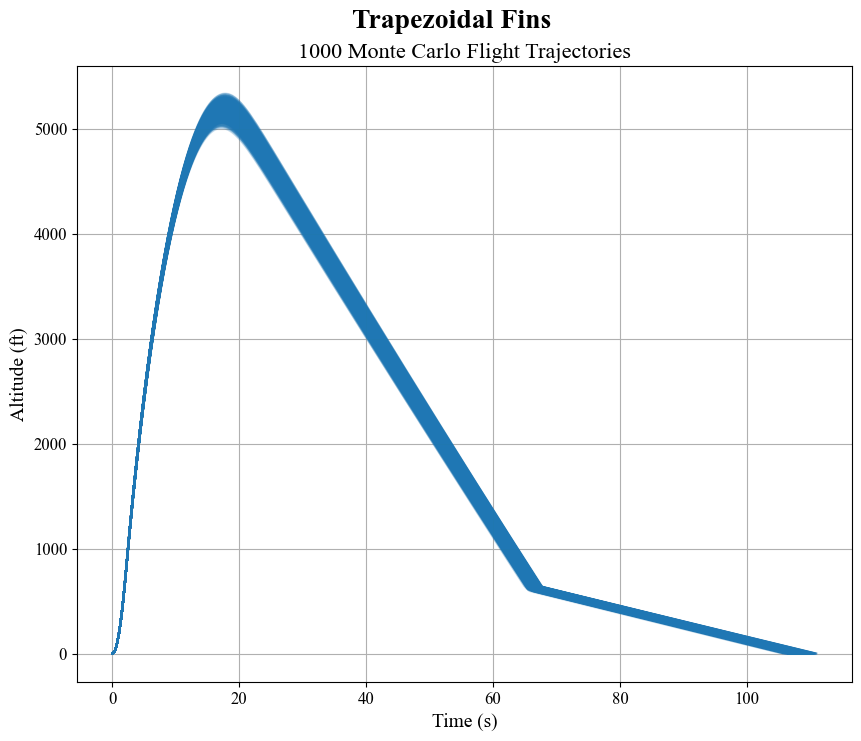

In [20]:
samples = len(trap_data)

fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Trapezoidal Fins', y=0.95)

for i, (sim, event) in enumerate(zip(trap_data, trap_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', label='Trapezoidal Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

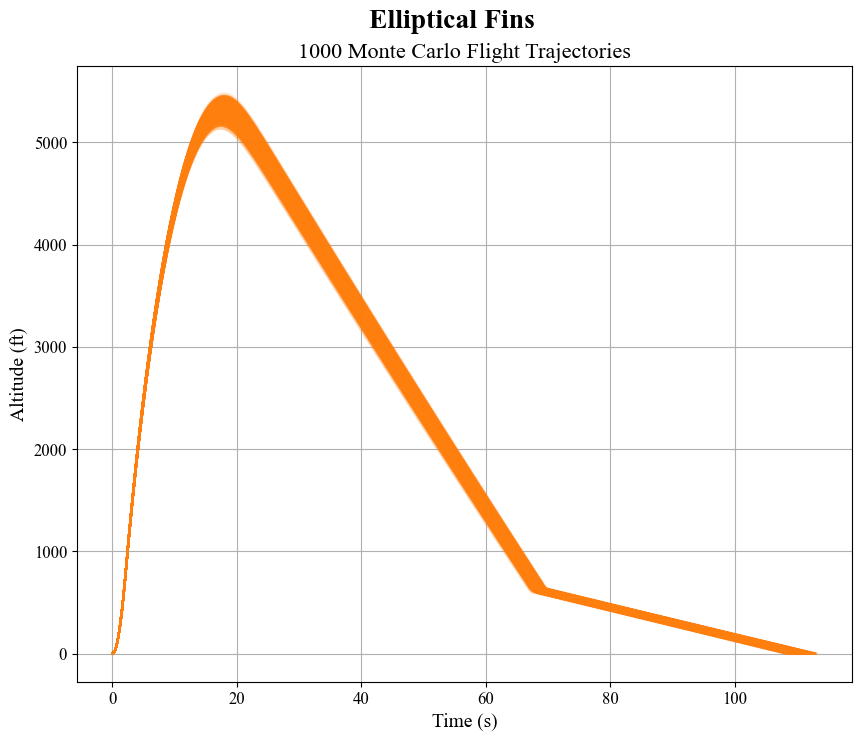

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Elliptical Fins', y=0.95)

for i, (sim, event) in enumerate(zip(ellip_data, ellip_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', label='Elliptical Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

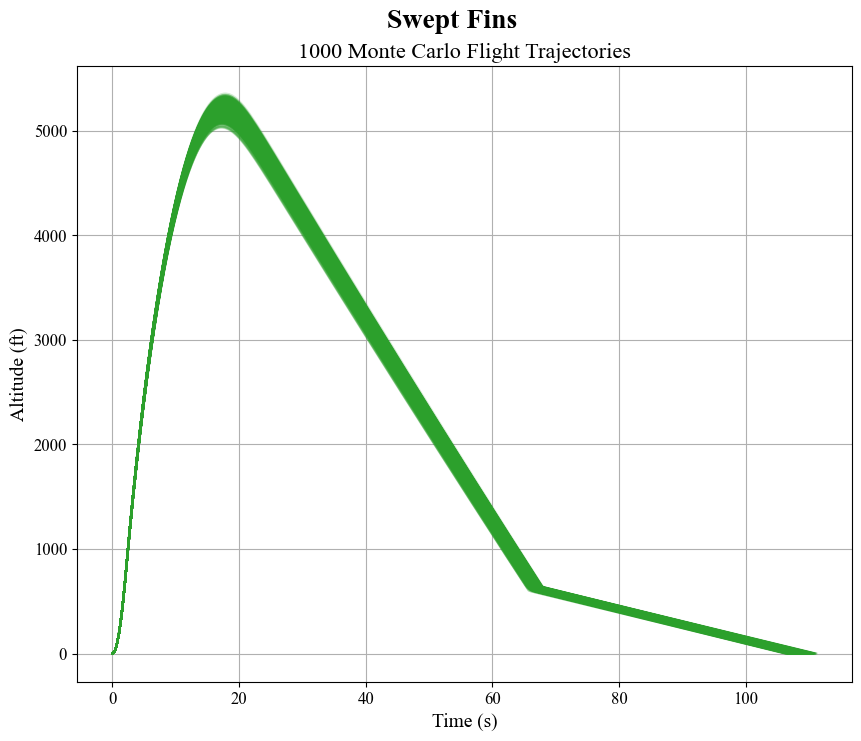

In [22]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Swept Fins', y=0.95)

for i, (sim, event) in enumerate(zip(swept_data, swept_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', label='Swept Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

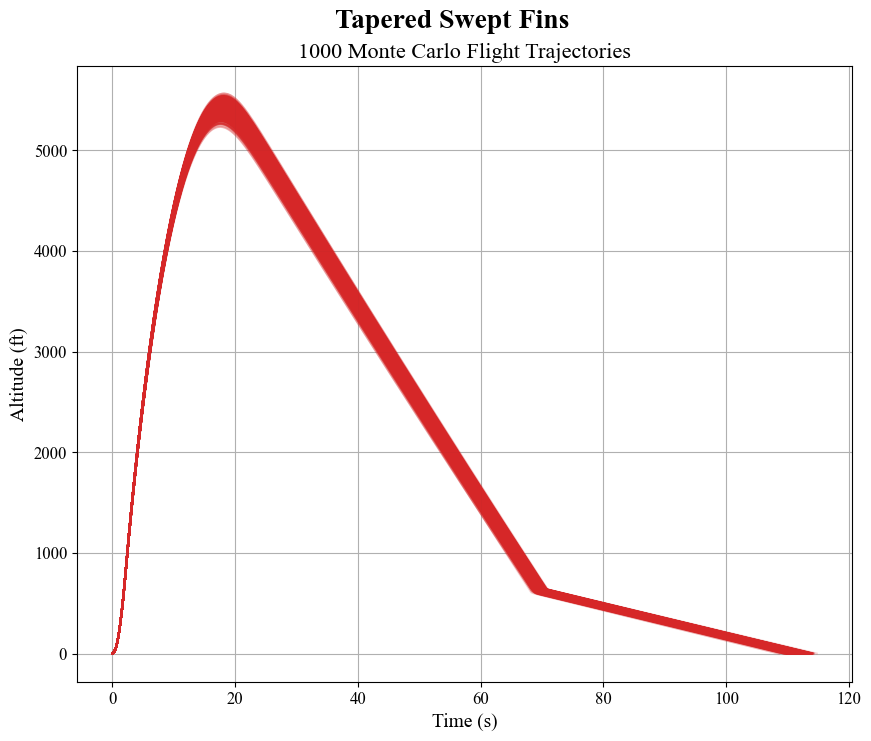

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Tapered Swept Fins', y=0.95)

for i, (sim, event) in enumerate(zip(tapswept_data, tapswept_events)):
    if i == 0:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', label='Tapered Swept Fin', alpha=0.2) # Convert to feet
    else:
        ax.plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', alpha=0.2) # Convert to feet

ax.grid()
ax.set_title(f'{samples} Monte Carlo Flight Trajectories')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (ft)')

plt.show()

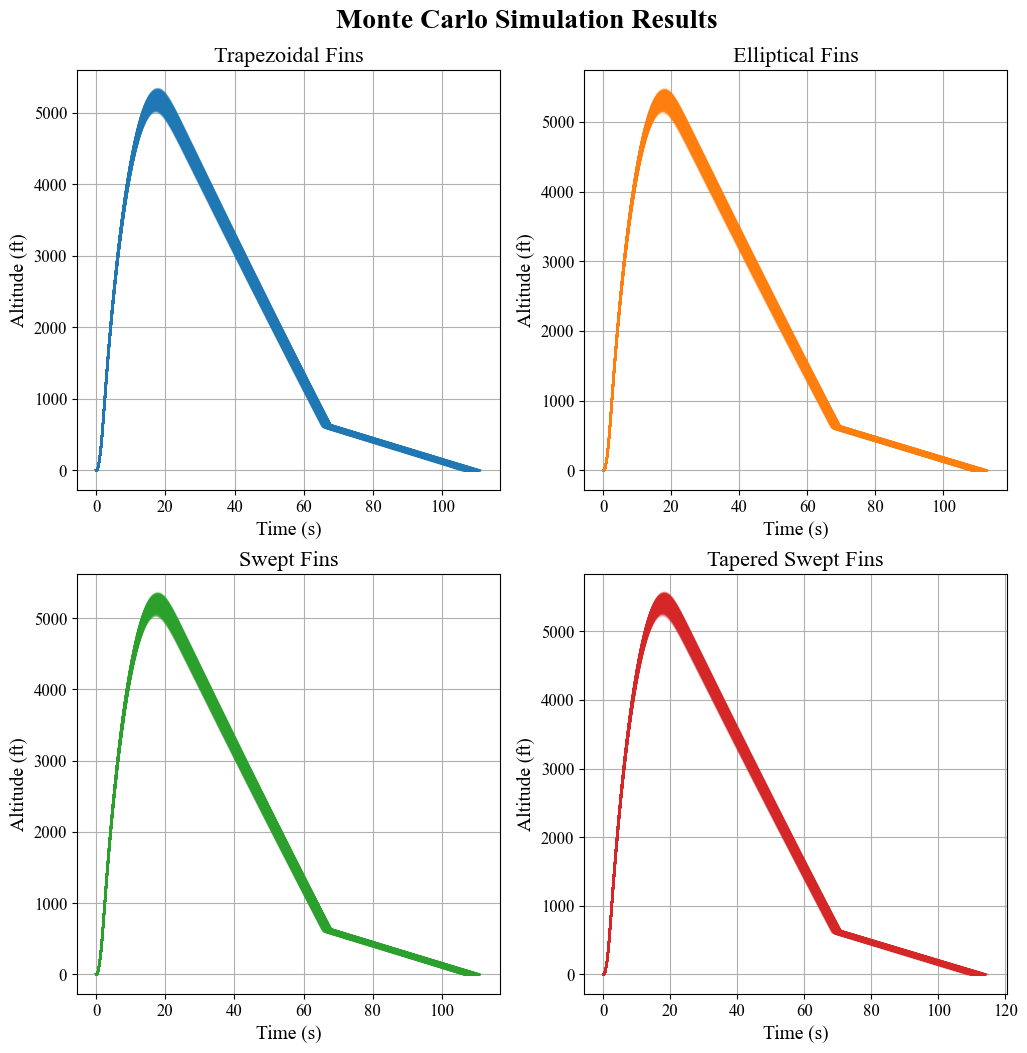

In [24]:
fig = plt.figure(figsize=(12, 12))
axes = fig.subplots(2, 2)

fig.suptitle('Monte Carlo Simulation Results', y=0.93)

for i, (sim, event) in enumerate(zip(trap_data, trap_events)):
    if i == 0:
        axes[0, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', label='Trapezoidal Fin', alpha=0.2) # Convert to feet
    else:
        axes[0, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:blue', alpha=0.2) # Convert to feet

for i, (sim, event) in enumerate(zip(ellip_data, ellip_events)):
    if i == 0:
        axes[0, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', label='Elliptical Fin', alpha=0.2) # Convert to feet
    else:
        axes[0, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:orange', alpha=0.2) # Convert to feet

for i, (sim, event) in enumerate(zip(swept_data, swept_events)):
    if i == 0:
        axes[1, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', label='Swept Fin', alpha=0.2) # Convert to feet
    else:
        axes[1, 0].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:green', alpha=0.2) # Convert to feet

for i, (sim, event) in enumerate(zip(tapswept_data, tapswept_events)):
    if i == 0:
        axes[1, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', label='Tapered Swept Fin', alpha=0.2) # Convert to feet
    else:
        axes[1, 1].plot(sim[orl.FlightDataType.TYPE_TIME], sim[orl.FlightDataType.TYPE_ALTITUDE] * 3.28084, color='tab:red', alpha=0.2) # Convert to feet

axes[0, 0].set_title('Trapezoidal Fins')
axes[0, 1].set_title('Elliptical Fins')
axes[1, 0].set_title('Swept Fins')
axes[1, 1].set_title('Tapered Swept Fins')

for ax in axes.flat:
    ax.grid()
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Altitude (ft)')
    # ax.legend()

# fig.savefig('./Figures/Flight Trajectories Together.png', dpi=500, bbox_inches='tight')

plt.show()

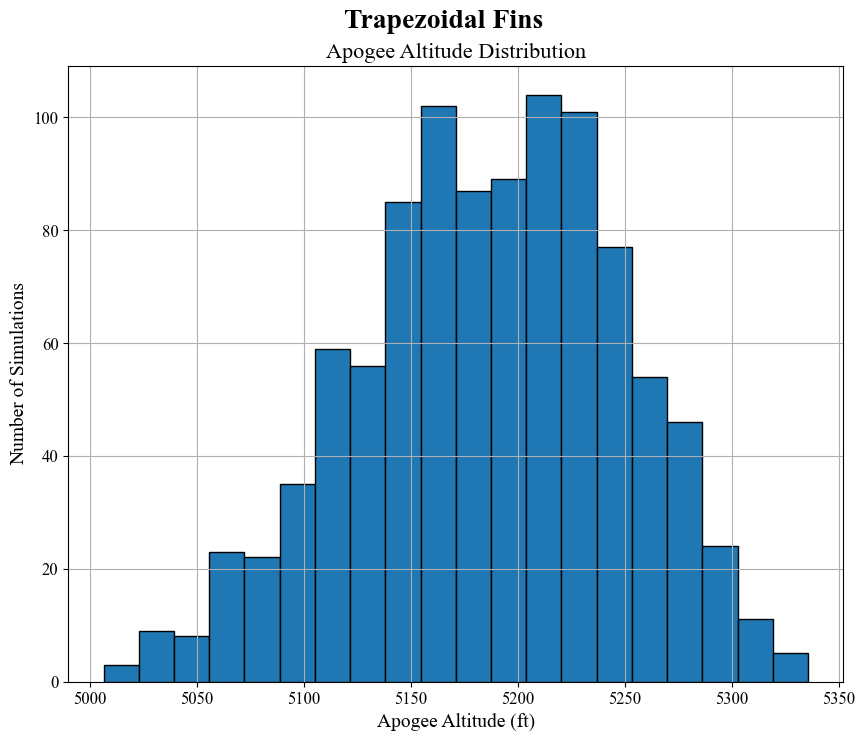

In [25]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Trapezoidal Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(trap_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:blue')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

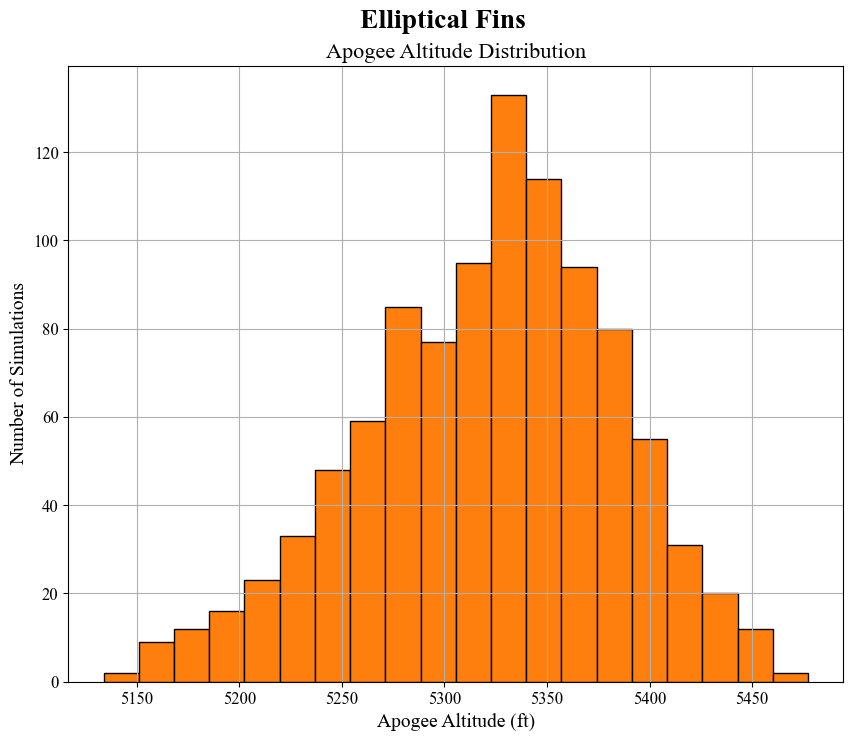

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Elliptical Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(ellip_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:orange')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

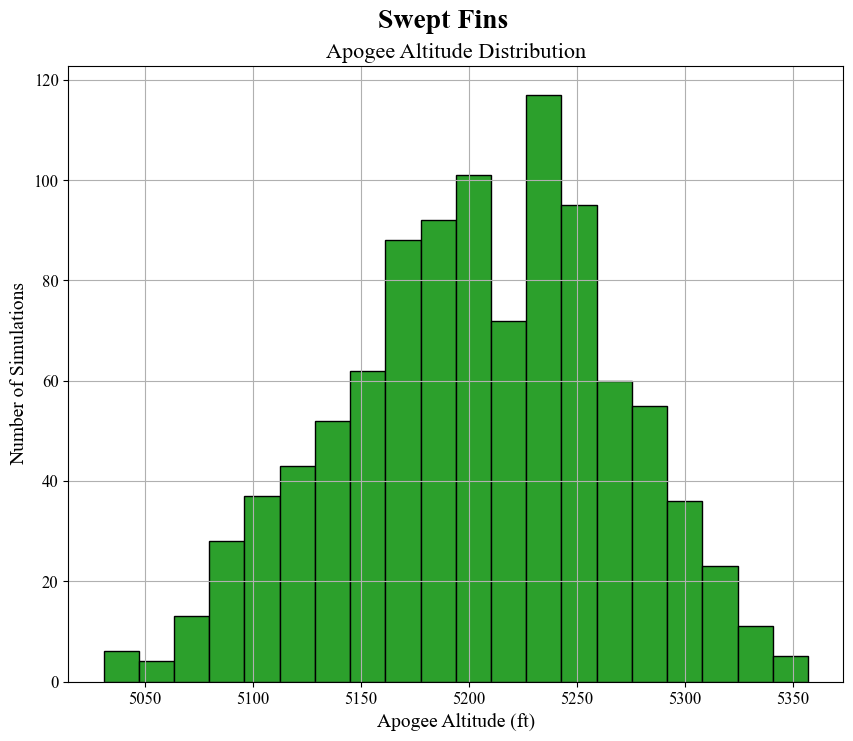

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Swept Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(swept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:green')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

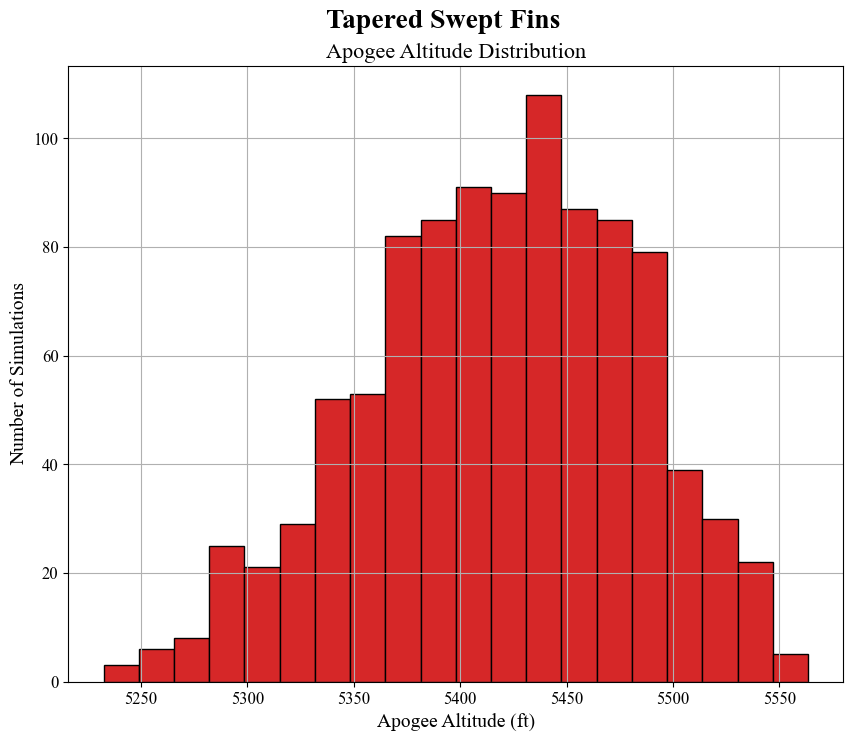

In [28]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('Tapered Swept Fins', y=0.95)
ax.set_title('Apogee Altitude Distribution')

ax.hist(tapswept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:red')
ax.grid()

ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')

plt.show()

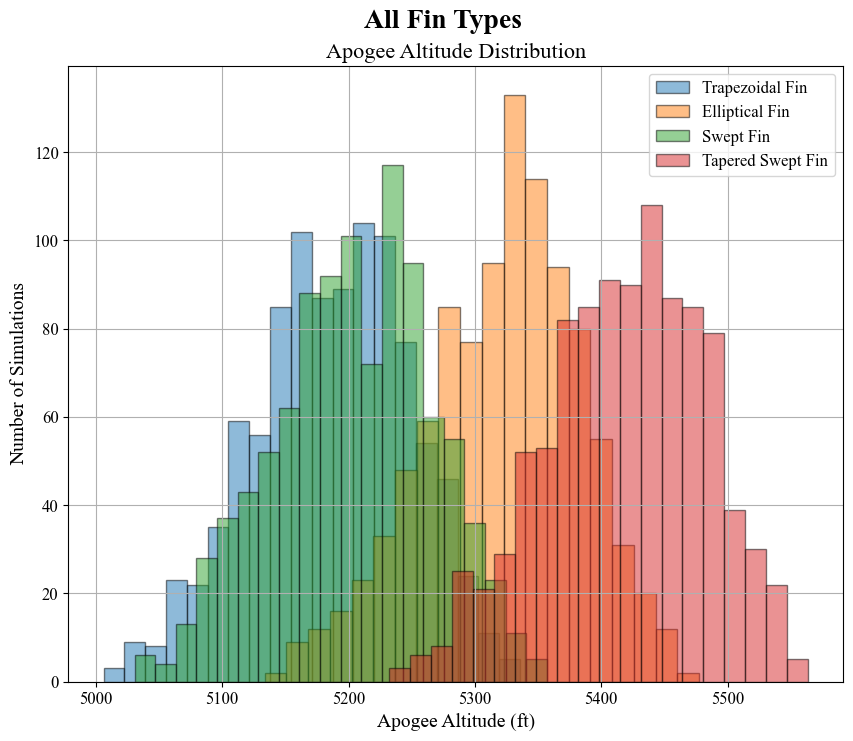

In [29]:
fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('All Fin Types', y=0.95)

ax.hist(trap_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Trapezoidal Fin')
ax.hist(ellip_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Elliptical Fin')
ax.hist(swept_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Swept Fin')
ax.hist(tapswept_apogee_altitudes, bins=20, edgecolor='black', alpha=0.5, label='Tapered Swept Fin')

ax.grid()
ax.set_title('Apogee Altitude Distribution')
ax.set_xlabel('Apogee Altitude (ft)')
ax.set_ylabel('Number of Simulations')
ax.legend()

# fig.savefig('./Figures/Apogee Distributions Together.png', dpi=500, bbox_inches='tight')

plt.show()

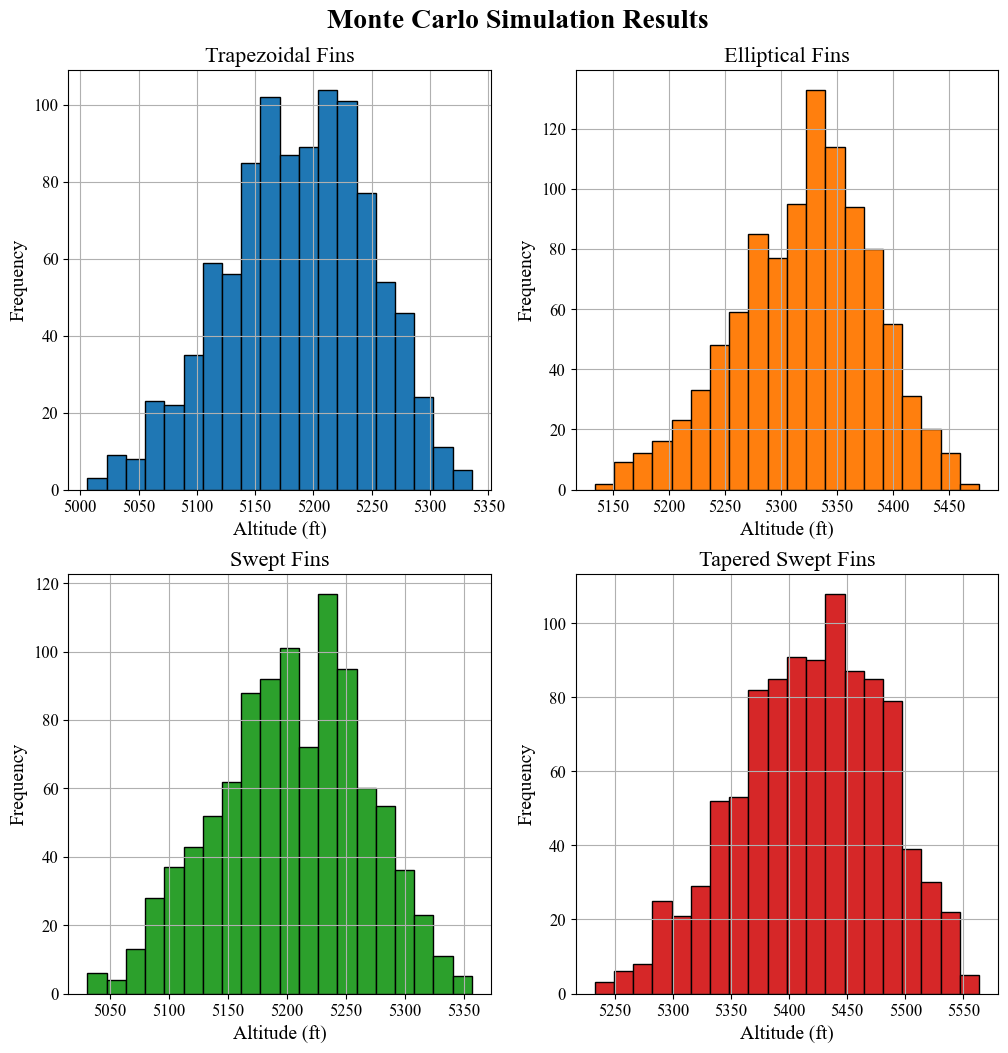

In [30]:
fig = plt.figure(figsize=(12, 12))
axes = fig.subplots(2, 2)

fig.suptitle('Monte Carlo Simulation Results', y=0.93)

axes[0, 0].hist(trap_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:blue')

axes[0, 1].hist(ellip_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:orange')

axes[1, 0].hist(swept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:green')

axes[1, 1].hist(tapswept_apogee_altitudes, bins=20, edgecolor='black', facecolor='tab:red')

axes[0, 0].set_title('Trapezoidal Fins')
axes[0, 1].set_title('Elliptical Fins')
axes[1, 0].set_title('Swept Fins')
axes[1, 1].set_title('Tapered Swept Fins')

for ax in axes.flat:
    ax.grid()
    ax.set_xlabel('Altitude (ft)')
    ax.set_ylabel('Frequency')
    # ax.legend()

# fig.savefig('./Figures/Apogee Distributions Separate.png', dpi=500, bbox_inches='tight')

plt.show()

In [31]:
print(f'Trapezoidal Fins Mean Apogee Altitude = {np.mean(trap_apogee_altitudes):.2f}, Std Dev = {np.std(trap_apogee_altitudes):.3f}')
print(f'Elliptical Fins Mean Apogee Altitude = {np.mean(ellip_apogee_altitudes):.2f}, Std Dev = {np.std(ellip_apogee_altitudes):.3f}')
print(f'Swept Fins Mean Apogee Altitude = {np.mean(swept_apogee_altitudes):.2f}, Std Dev = {np.std(swept_apogee_altitudes):.3f}')
print(f'Tapered Swept Fins Mean Apogee Altitude = {np.mean(tapswept_apogee_altitudes):.2f}, Std Dev = {np.std(tapswept_apogee_altitudes):.3f}')

Trapezoidal Fins Mean Apogee Altitude = 5186.38, Std Dev = 61.631
Elliptical Fins Mean Apogee Altitude = 5321.85, Std Dev = 61.097
Swept Fins Mean Apogee Altitude = 5204.10, Std Dev = 61.811
Tapered Swept Fins Mean Apogee Altitude = 5418.75, Std Dev = 62.679


In [32]:
print(f'Trapezoidal Fins Mean Apogee Time = {np.mean(trap_apogee_times):.2f}, Std Dev = {np.std(trap_apogee_times):.3f}')
print(f'Elliptical Fins Mean Apogee Time = {np.mean(ellip_apogee_times):.2f}, Std Dev = {np.std(ellip_apogee_times):.3f}')
print(f'Swept Fins Mean Apogee Time = {np.mean(swept_apogee_times):.2f}, Std Dev = {np.std(swept_apogee_times):.3f}')
print(f'Tapered Swept Fins Mean Apogee Time = {np.mean(tapswept_apogee_times):.2f}, Std Dev = {np.std(tapswept_apogee_times):.3f}')

Trapezoidal Fins Mean Apogee Time = 17.59, Std Dev = 0.124
Elliptical Fins Mean Apogee Time = 17.80, Std Dev = 0.122
Swept Fins Mean Apogee Time = 17.63, Std Dev = 0.123
Tapered Swept Fins Mean Apogee Time = 17.99, Std Dev = 0.125


In [33]:
print(f'Trapezoidal Fins Mean Max Velocity = {np.mean(trap_max_velocity):.2f}, Std Dev = {np.std(trap_max_velocity):.3f}')
print(f'Elliptical Fins Mean Max Velocity = {np.mean(ellip_max_velocity):.2f}, Std Dev = {np.std(ellip_max_velocity):.3f}')
print(f'Swept Fins Mean Max Velocity = {np.mean(swept_max_velocity):.2f}, Std Dev = {np.std(swept_max_velocity):.3f}')
print(f'Tapered Swept Fins Mean Max Velocity = {np.mean(tapswept_max_velocity):.2f}, Std Dev = {np.std(tapswept_max_velocity):.3f}')

Trapezoidal Fins Mean Max Velocity = 691.36, Std Dev = 0.831
Elliptical Fins Mean Max Velocity = 702.08, Std Dev = 0.839
Swept Fins Mean Max Velocity = 691.71, Std Dev = 0.821
Tapered Swept Fins Mean Max Velocity = 704.03, Std Dev = 0.817


In [34]:
print(f'Trapezoidal Fins Mean Max Acceleration = {np.mean(trap_max_acceleration):.2f}, Std Dev = {np.std(trap_max_acceleration):.3f}')
print(f'Elliptical Fins Mean Max Acceleration = {np.mean(ellip_max_acceleration):.2f}, Std Dev = {np.std(ellip_max_acceleration):.3f}')
print(f'Swept Fins Mean Max Acceleration = {np.mean(swept_max_acceleration):.2f}, Std Dev = {np.std(swept_max_acceleration):.3f}')
print(f'Tapered Swept Fins Mean Max Acceleration = {np.mean(tapswept_max_acceleration):.2f}, Std Dev = {np.std(tapswept_max_acceleration):.3f}')

Trapezoidal Fins Mean Max Acceleration = 1248.95, Std Dev = 0.058
Elliptical Fins Mean Max Acceleration = 1248.89, Std Dev = 0.057
Swept Fins Mean Max Acceleration = 1248.94, Std Dev = 0.057
Tapered Swept Fins Mean Max Acceleration = 1248.89, Std Dev = 0.056


In [35]:
print(f'Trapezoidal Fins Mean Off-Rod Velocity = {np.mean(trap_off_rod_velocity):.2f}, Std Dev = {np.std(trap_off_rod_velocity):.3f}')
print(f'Elliptical Fins Mean Off-Rod Velocity = {np.mean(ellip_off_rod_velocity):.2f}, Std Dev = {np.std(ellip_off_rod_velocity):.3f}')
print(f'Swept Fins Mean Off-Rod Velocity = {np.mean(swept_off_rod_velocity):.2f}, Std Dev = {np.std(swept_off_rod_velocity):.3f}')
print(f'Tapered Swept Fins Mean Off-Rod Velocity = {np.mean(tapswept_off_rod_velocity):.2f}, Std Dev = {np.std(tapswept_off_rod_velocity):.3f}')

Trapezoidal Fins Mean Off-Rod Velocity = 93.78, Std Dev = 0.058
Elliptical Fins Mean Off-Rod Velocity = 95.16, Std Dev = 0.060
Swept Fins Mean Off-Rod Velocity = 93.78, Std Dev = 0.056
Tapered Swept Fins Mean Off-Rod Velocity = 95.17, Std Dev = 0.061


In [36]:
print(f'Trapezoidal Fins Mean Full Flight Duration = {np.mean(trap_full_flight_duration):.2f}, Std Dev = {np.std(trap_full_flight_duration):.3f}')
print(f'Elliptical Fins Mean Full Flight Duration = {np.mean(ellip_full_flight_duration):.2f}, Std Dev = {np.std(ellip_full_flight_duration):.3f}')
print(f'Swept Fins Mean Full Flight Duration = {np.mean(swept_full_flight_duration):.2f}, Std Dev = {np.std(swept_full_flight_duration):.3f}')
print(f'Tapered Swept Fins Mean Full Flight Duration = {np.mean(tapswept_full_flight_duration):.2f}, Std Dev = {np.std(tapswept_full_flight_duration):.3f}')

Trapezoidal Fins Mean Full Flight Duration = 108.47, Std Dev = 1.008
Elliptical Fins Mean Full Flight Duration = 110.76, Std Dev = 1.017
Swept Fins Mean Full Flight Duration = 108.79, Std Dev = 1.005
Tapered Swept Fins Mean Full Flight Duration = 112.00, Std Dev = 1.047


In [37]:
print(f'Trapezoidal Fins Mean Ground Hit Velocity = {np.mean(trap_ground_hit_velocity):.2f}, Std Dev = {np.std(trap_ground_hit_velocity):.3f}')
print(f'Elliptical Fins Mean Ground Hit Velocity = {np.mean(ellip_ground_hit_velocity):.2f}, Std Dev = {np.std(ellip_ground_hit_velocity):.3f}')
print(f'Swept Fins Mean Ground Hit Velocity = {np.mean(swept_ground_hit_velocity):.2f}, Std Dev = {np.std(swept_ground_hit_velocity):.3f}')
print(f'Tapered Swept Fins Mean Ground Hit Velocity = {np.mean(tapswept_ground_hit_velocity):.2f}, Std Dev = {np.std(tapswept_ground_hit_velocity):.3f}')

Trapezoidal Fins Mean Ground Hit Velocity = 14.83, Std Dev = 0.239
Elliptical Fins Mean Ground Hit Velocity = 14.72, Std Dev = 0.233
Swept Fins Mean Ground Hit Velocity = 14.84, Std Dev = 0.236
Tapered Swept Fins Mean Ground Hit Velocity = 14.73, Std Dev = 0.233


In [38]:
print(f'Trapezoidal Fins Mean Off-Rod Stability = {np.mean(trap_off_rod_stability):.2f}, Std Dev = {np.std(trap_off_rod_stability):.3f}')
print(f'Elliptical Fins Mean Off-Rod Stability = {np.mean(ellip_off_rod_stability):.2f}, Std Dev = {np.std(ellip_off_rod_stability):.3f}')
print(f'Swept Fins Mean Off-Rod Stability = {np.mean(swept_off_rod_stability):.2f}, Std Dev = {np.std(swept_off_rod_stability):.3f}')
print(f'Tapered Swept Fins Mean Off-Rod Stability = {np.mean(tapswept_off_rod_stability):.2f}, Std Dev = {np.std(tapswept_off_rod_stability):.3f}')

Trapezoidal Fins Mean Off-Rod Stability = nan, Std Dev = nan
Elliptical Fins Mean Off-Rod Stability = nan, Std Dev = nan
Swept Fins Mean Off-Rod Stability = nan, Std Dev = nan
Tapered Swept Fins Mean Off-Rod Stability = nan, Std Dev = nan


In [40]:
print(f'Trapezoidal Fins Descent Time = {np.mean(np.array(trap_full_flight_duration) - np.array(trap_apogee_times)):.2f}, Std Dev = {np.std(np.array(trap_full_flight_duration) - np.array(trap_apogee_times)):.3f}')
print(f'Elliptical Fins Descent Time = {np.mean(np.array(ellip_full_flight_duration) - np.array(ellip_apogee_times)):.2f}, Std Dev = {np.std(np.array(ellip_full_flight_duration) - np.array(ellip_apogee_times)):.3f}')
print(f'Swept Fins Descent Time = {np.mean(np.array(swept_full_flight_duration) - np.array(swept_apogee_times)):.2f}, Std Dev = {np.std(np.array(swept_full_flight_duration) - np.array(swept_apogee_times)):.3f}')
print(f'Tapered Swept Fins Descent Time = {np.mean(np.array(tapswept_full_flight_duration) - np.array(tapswept_apogee_times)):.2f}, Std Dev = {np.std(np.array(tapswept_full_flight_duration) - np.array(tapswept_apogee_times)):.3f}')

Trapezoidal Fins Descent Time = 90.88, Std Dev = 0.977
Elliptical Fins Descent Time = 92.97, Std Dev = 0.986
Swept Fins Descent Time = 91.16, Std Dev = 0.966
Tapered Swept Fins Descent Time = 94.01, Std Dev = 1.008
